In [1]:
# /// script
# dependencies = [
#   "openai>=1.59.0",
# ]
# requires-python = ">=3.10"
# ///
from openai import OpenAI
client = OpenAI()

In [2]:
# Create the assistant
my_assistant = client.beta.assistants.create(
    instructions="You are a research assistant. You answer questions about any topic, and when necessary, you write and run Python code to generate any files you need.",
    name="Personal Research Assistant",
    tools=[{"type": "code_interpreter"}, {"type": "file_search"}],
    model="gpt-4o",
)
print(my_assistant)

Assistant(id='asst_qNspjneS9NEgxVuO7ib5oXHk', created_at=1736791369, description=None, instructions='You are a research assistant. You answer questions about any topic, and when necessary, you write and run Python code to generate any files you need.', metadata={}, model='gpt-4o', name='Personal Research Assistant', object='assistant', tools=[CodeInterpreterTool(type='code_interpreter'), FileSearchTool(type='file_search', file_search=FileSearch(max_num_results=None, ranking_options=FileSearchRankingOptions(score_threshold=0.0, ranker='default_2024_08_21')))], response_format='auto', temperature=1.0, tool_resources=ToolResources(code_interpreter=ToolResourcesCodeInterpreter(file_ids=[]), file_search=ToolResourcesFileSearch(vector_store_ids=[])), top_p=1.0)


In [3]:
thread = client.beta.threads.create()

In [4]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Generate a graph for the sin of a function in 4 different ways and place it into a nice square dashboard image."
)

print(message)

Message(id='msg_ldTtcADnCefUS3l4HFniK2d9', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='Generate a graph for the sin of a function in 4 different ways and place it into a nice square dashboard image.'), type='text')], created_at=1736791414, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_asSf7Rpl2ZikZlnrrP8lRggq')


In [5]:
run = client.beta.threads.runs.create_and_poll(
    thread_id=thread.id,
    assistant_id=my_assistant.id,
    instructions="Address the user as Lucas S.",
)

print(run)

if run.status == 'completed': 
    messages = client.beta.threads.messages.list(
    thread_id=thread.id
    )
    print(messages)
else:
    print(run.status)

In [7]:
messages

SyncCursorPage[Message](data=[Message(id='msg_4jgH98Jf1e8BN9TP5UjaXqxM', assistant_id='asst_qNspjneS9NEgxVuO7ib5oXHk', attachments=[Attachment(file_id='file-HswmBQwT4tU6qMeSa5LYQh', tools=[CodeInterpreterTool(type='code_interpreter')])], completed_at=None, content=[ImageFileContentBlock(image_file=ImageFile(file_id='file-PoembivtuianoHrr6ZM9R9', detail=None), type='image_file'), TextContentBlock(text=Text(annotations=[FilePathAnnotation(end_index=515, file_path=FilePath(file_id='file-HswmBQwT4tU6qMeSa5LYQh'), start_index=479, text='sandbox:/mnt/data/sine_dashboard.png', type='file_path')], value="I've created a square dashboard with four different graphs of sine functions:\n\n1. **Standard Sine Wave**: Represents the standard \\(\\sin(x)\\) function.\n2. **Double Frequency Sine Wave**: Shows the sine wave with double the normal frequency \\(\\sin(2x)\\).\n3. **Double Amplitude Sine Wave**: Depicts the sine wave with double the amplitude \\(2\\sin(x)\\).\n4. **Phase Shift Sine Wave**: D

In [8]:
# Access the file ID from the first message's content
file_id = messages.data[0].content[0].image_file.file_id
print(f"File ID: {file_id}")

File ID: file-PoembivtuianoHrr6ZM9R9


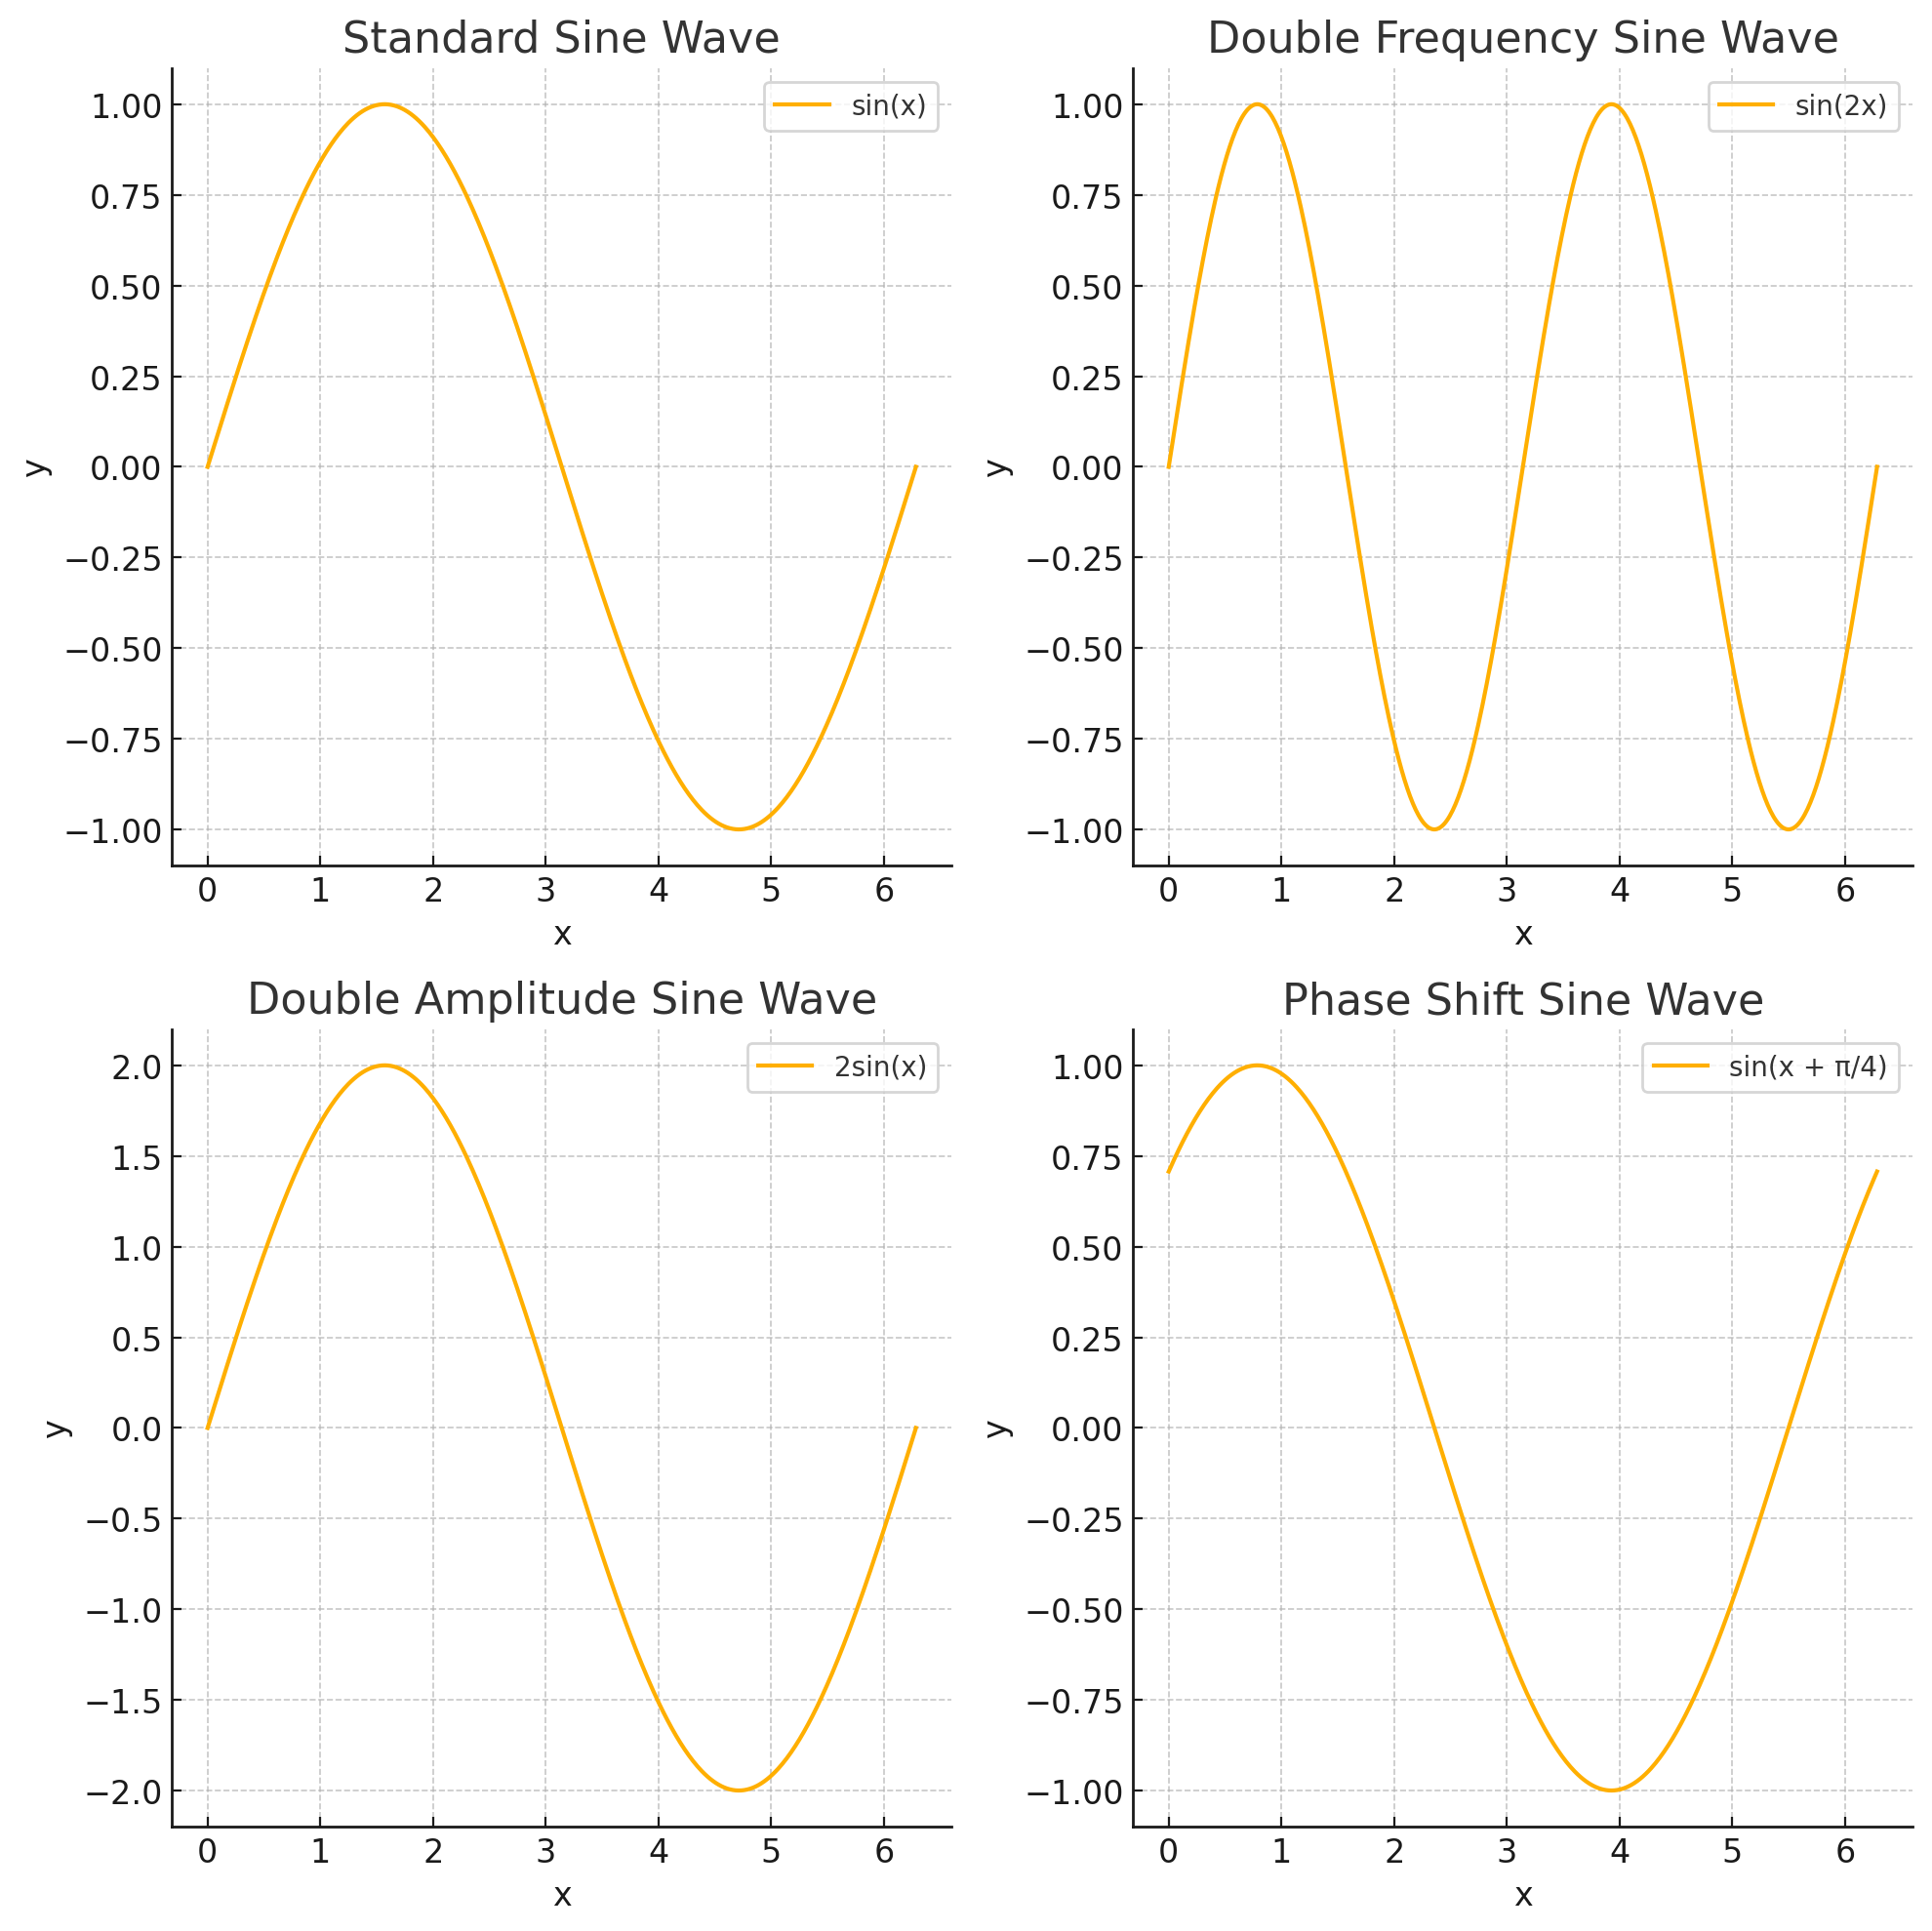

In [9]:
from IPython.display import Image

# Downloading the file that was generated by the assistant running the code interpreter
image_data = client.files.content(file_id)
image_data_bytes = image_data.read()

Image(image_data_bytes)